In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
data.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
898,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Coal,Oil,NaN,...,WRI,NaN,2018.0,3158.016,3194.35982,3709.552200,3123.572061,3156.053669,Central Electricity Authority,NaN
901,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,Biomass,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,Oil,NaN,NaN,...,WRI,NaN,2018.0,20.900,0.00000,0.000000,0.000000,NaN,Central Electricity Authority,NaN
903,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.00,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#EDA

In [63]:
#lets check all the columns and data type of each.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We See there are no string dtype, each columns has 908 entries in it and some has float datatype and some has object datatype.

In [64]:
#Lets check for null values now

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [3]:
#Filling out the null values and dropping of unnecessary columns from the dataset.

data['latitude'] =  data['latitude'].fillna(data['latitude'].mean())#Mean since the data is continuous
data['longitude'] =  data['longitude'].fillna(data['longitude'].median()) #since the data had bit of skewness and is continuous
data['other_fuel1'] =  data['other_fuel1'].fillna(data['other_fuel1'].mode()[0]) #Mode since it is categorical
data.drop(columns = ['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'], axis = 1, inplace = True)# Since these two columns has only null values in it.
data['commissioning_year'] =  data['commissioning_year'].fillna(data['commissioning_year'].mode()[0]) #It is categorical
data.drop(columns = ['owner','year_of_capacity_data','generation_data_source','country','country_long','url','name'], axis = 1, inplace = True) #as it will hardly play any role in it and it mostly had one type of data
data['geolocation_source'] =  data['geolocation_source'].fillna(data['geolocation_source'].mode()[0]) #Mode since it is categorical.
data['generation_gwh_2013'] =  data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].median()) #Median since it is continuous and has bit of skewed data in it.
data['generation_gwh_2014'] =  data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median()) #Median since it is continuous and has bit of skewed data in it.
data['generation_gwh_2015'] =  data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median()) #Median since it is continuous and has bit of skewed data in it.
data['generation_gwh_2016'] =  data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median()) #Median since it is continuous and has bit of skewed data in it.
data['generation_gwh_2017'] =  data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median()) #Median since it is continuous and has bit of skewed data in it.

In [4]:
#Lets check how the data is distributed

data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,2003.624449,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766
std,580.221767,6.088110,4.783873,15.238021,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,797.063475,805.760000,701.027250,716.728350,807.601700
50%,60.000000,21.278850,76.719250,2013.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2013.000000,797.063475,805.760000,701.027250,716.728350,807.601700
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


With the above we see how the data is distributed and see the mean, standard deviation, percentage of value falling under 25%,50%,75%, Min Value, Max Value of each column.

In [10]:
#Lets check the shape of dataset now.

data.shape

(908, 14)

We see that there are 908 rows and 14 columns in the dataset.

In [6]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = LE.fit_transform(data[i].values.reshape(-1,1))

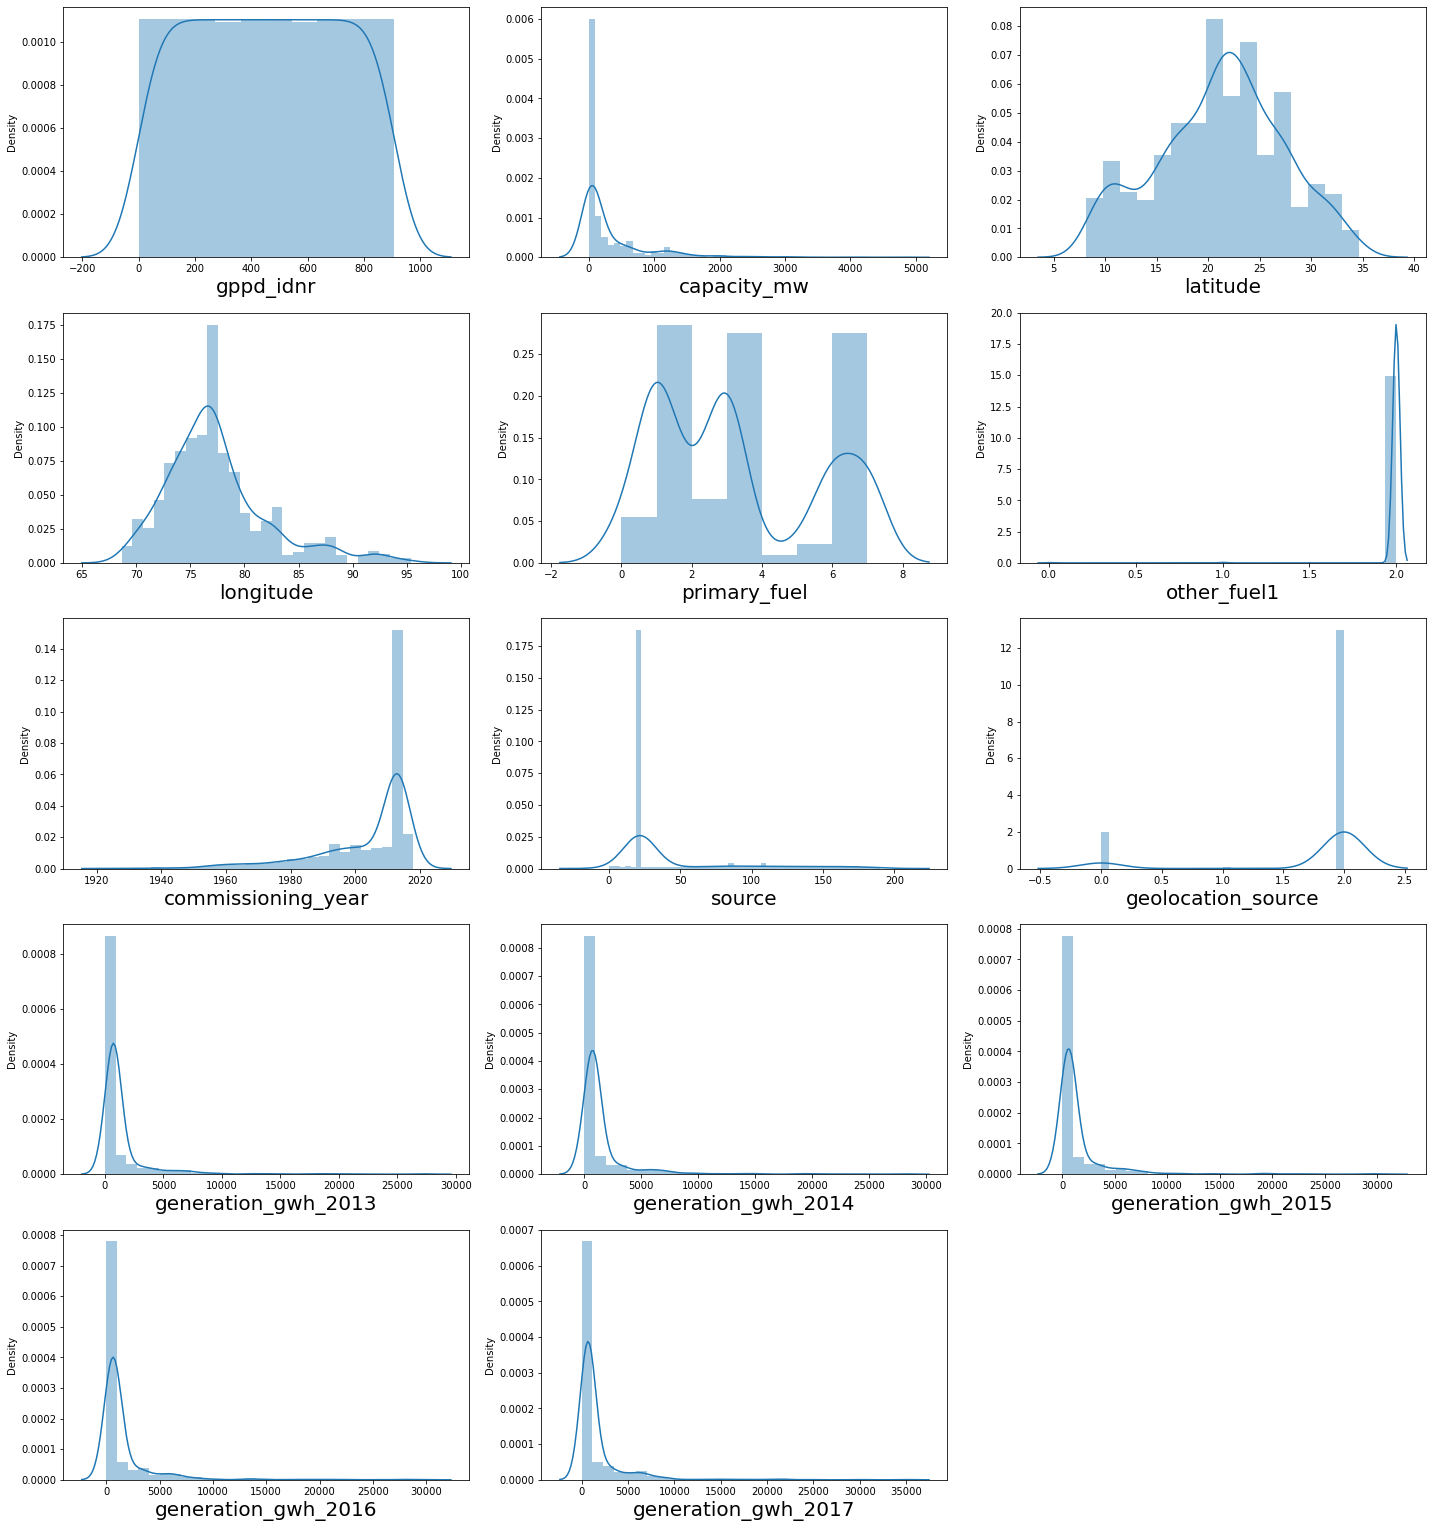

In [8]:
#Plotting dist plot to check for skewness

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=18:
        ax=plt.subplot(6,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize= 20)
        
    plotnumber+=1
plt.tight_layout()    

In [9]:
data.skew()

gppd_idnr               0.000000
capacity_mw             3.193257
latitude               -0.147391
longitude               1.150963
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year     -1.779021
source                  1.829145
geolocation_source     -2.161710
generation_gwh_2013     5.535740
generation_gwh_2014     5.325540
generation_gwh_2015     5.565770
generation_gwh_2016     5.278233
generation_gwh_2017     5.312975
dtype: float64

In [10]:
data['source'].value_counts()

22     520
21     124
84      10
109      8
110      6
      ... 
118      1
117      1
114      1
113      1
0        1
Name: source, Length: 191, dtype: int64

With the above plots and method it looks like there is little bit of skewness in the columns: longitude,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017.

In [11]:
#We will proceed ahead and check the relation of each feature with the label to see if they are positively related or not.

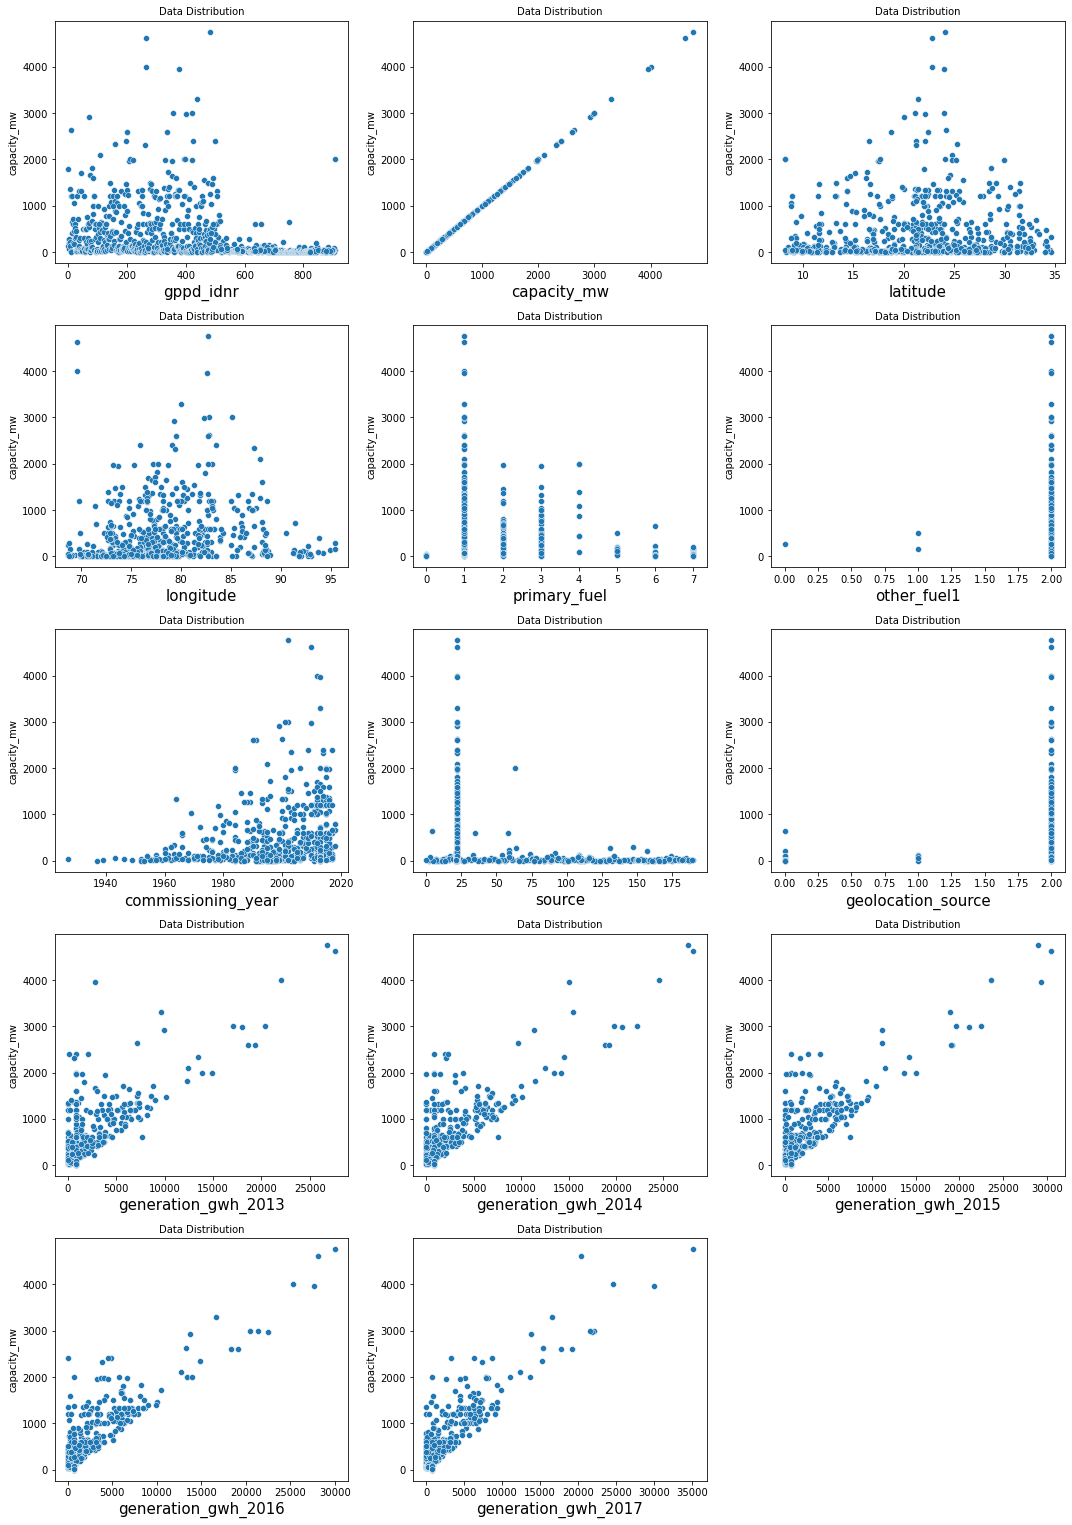

In [12]:
#Plotting scatter plot to see the relation of features with label(capacity_mw)

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['capacity_mw'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

It is visible that capacity_mw has positive relation with most of the features except for source and gppd_idnr which has bit of negative relation.

With latitude and longitude there seems to be no specific relation with capacity_mw

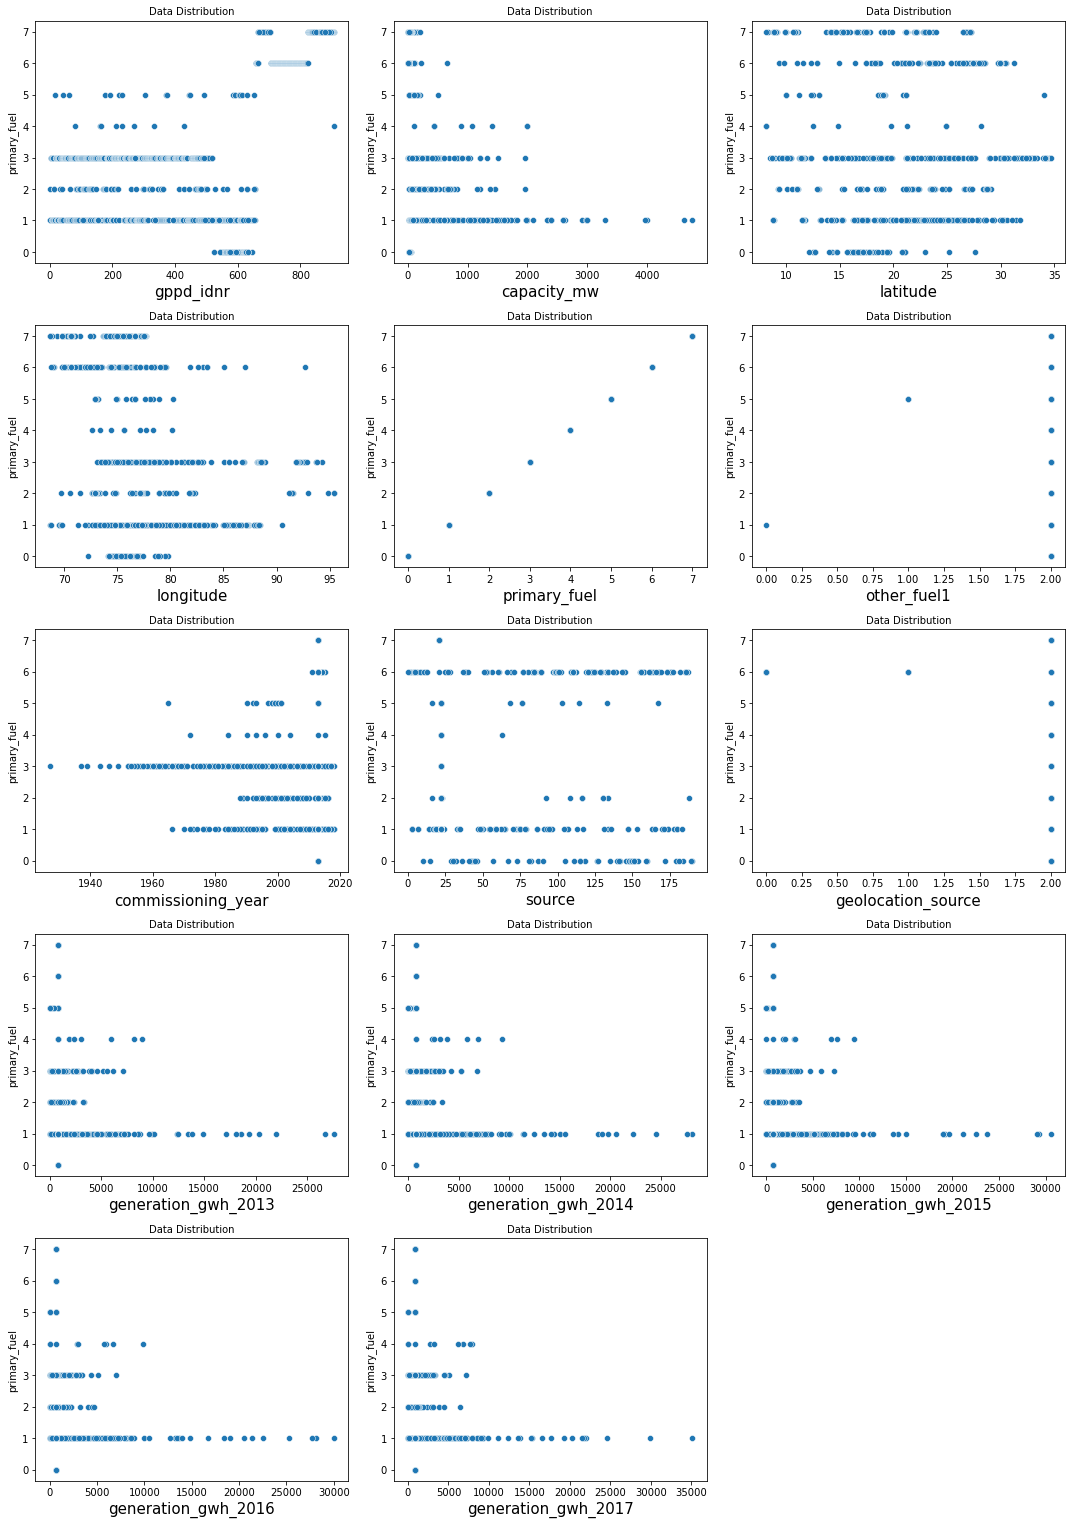

In [13]:
#Plotting scatter plot to see the relation of features with label(primary_fuel)

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['primary_fuel'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

Observations from the above plotting no relation can be determined.

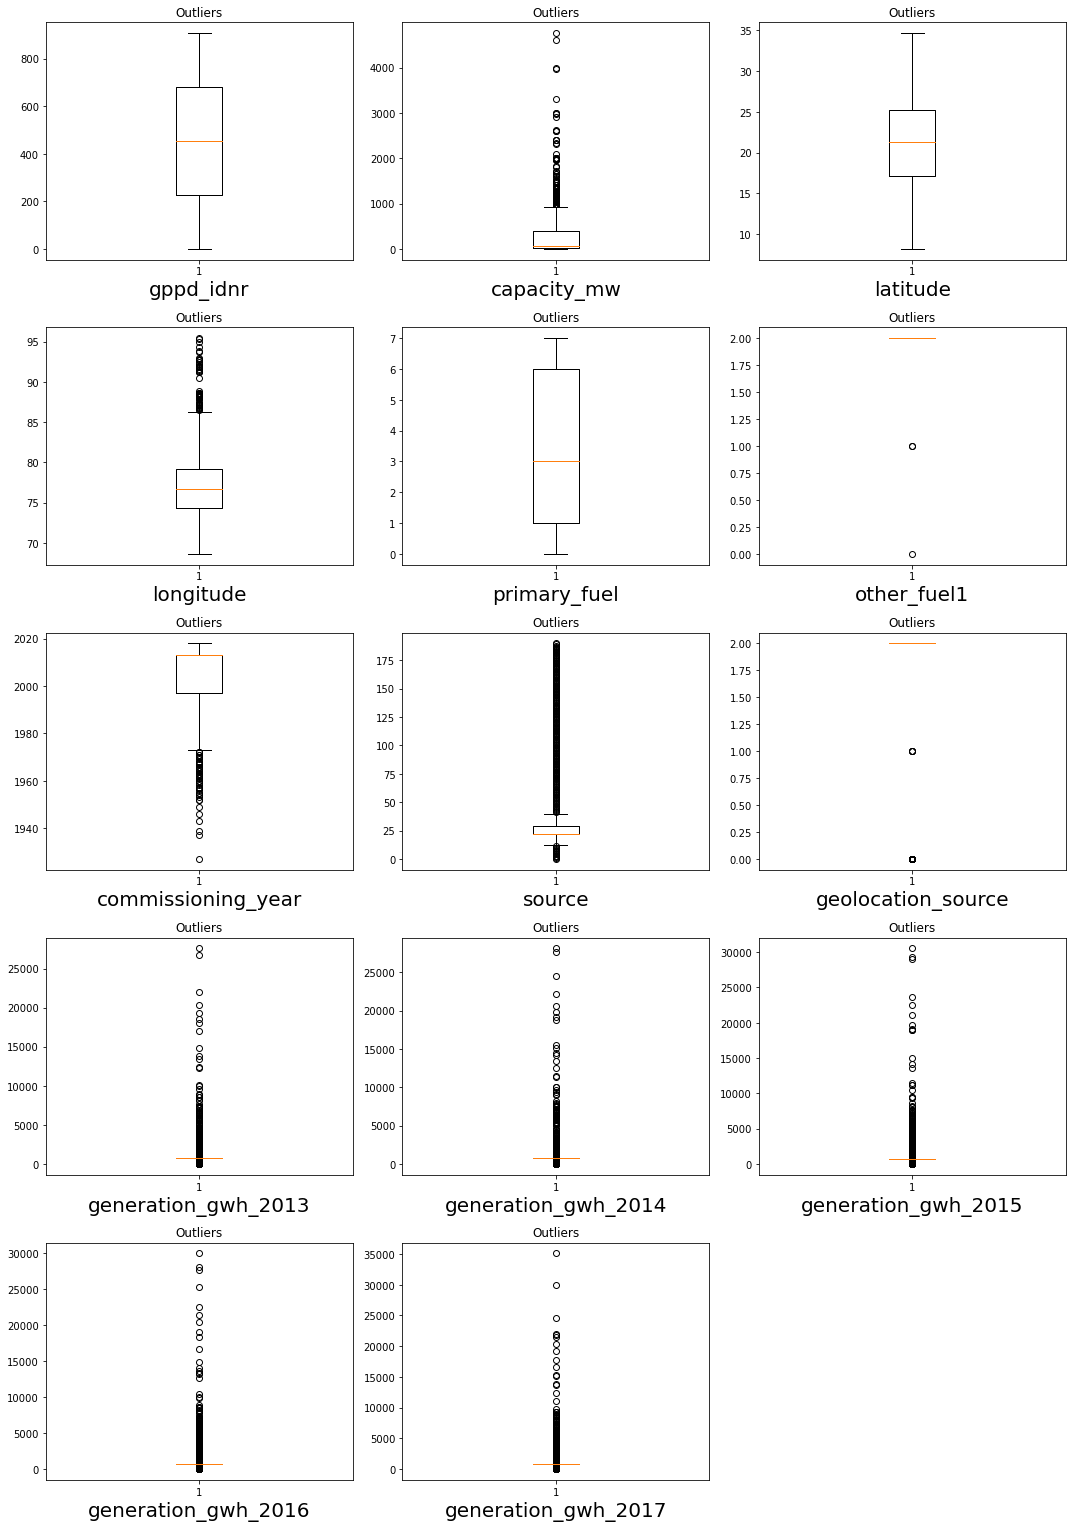

In [14]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Outliers')
    
    plotnumber +=1
plt.tight_layout()

With the help of above plotting we can see that there are too many outliers in the column source, commissioning year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017

In [15]:
#Now will check the collinearity among features with the help of heatmap.

In [16]:
corr_mat = data.corr()
corr_mat

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
gppd_idnr,1.000000,-0.334308,-0.105932,-0.381087,0.607373,0.001812,0.476840,0.416575,-0.464119,-0.155146,-0.160279,-0.176156,-0.187756,-0.183912
capacity_mw,-0.334308,1.000000,0.049790,0.200473,-0.377783,0.002672,0.012518,-0.241701,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,-0.105932,0.049790,1.000000,0.031483,-0.013453,0.036606,0.034896,0.055943,-0.183999,0.054483,0.058936,0.054242,0.048095,0.057915
longitude,-0.381087,0.200473,0.031483,1.000000,-0.352749,0.029861,-0.144785,-0.236349,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,0.607373,-0.377783,-0.013453,-0.352749,1.000000,0.004902,0.145487,0.053609,-0.482803,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818
other_fuel1,0.001812,0.002672,0.036606,0.029861,0.004902,1.000000,0.054789,0.026557,-0.021383,0.006463,0.005641,0.008813,0.013677,0.011966
commissioning_year,0.476840,0.012518,0.034896,-0.144785,0.145487,0.054789,1.000000,0.301660,-0.242439,-0.043554,-0.017599,0.005967,0.030519,0.042622
source,0.416575,-0.241701,0.055943,-0.236349,0.053609,0.026557,0.301660,1.000000,-0.505823,-0.121131,-0.125425,-0.131500,-0.136135,-0.135138
geolocation_source,-0.464119,0.204698,-0.183999,0.249233,-0.482803,-0.021383,-0.242439,-0.505823,1.000000,0.097530,0.100988,0.105880,0.109612,0.108809
generation_gwh_2013,-0.155146,0.756523,0.054483,0.102637,-0.228761,0.006463,-0.043554,-0.121131,0.097530,1.000000,0.970385,0.907385,0.878836,0.839297


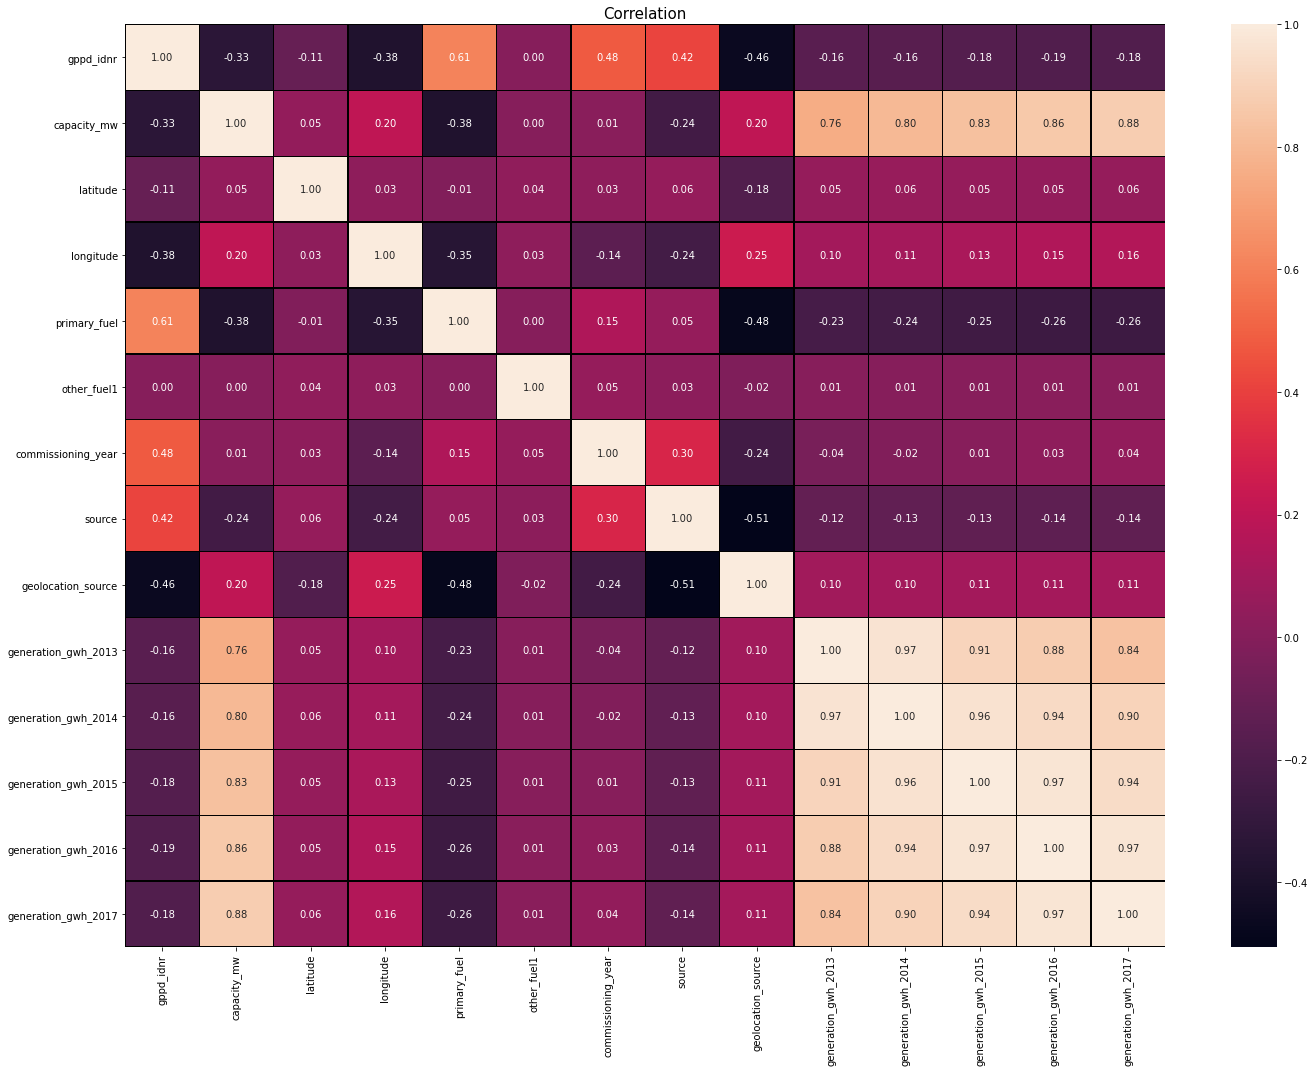

In [17]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

With the heatmap we found that generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are mostly co-related with each other

capacity_mw has Minimum Correlation with the column : gppd_idnr(-33%)

capacity_mw has Maximum Correlation with the column : generation_gwh_2017 - (88%)

primary_fuel has Minimum Correlation with the column : geolocation_source (-48%)

primary_fuel has Maximum Correlation with the column : gppd_idnr (61%)

**We will remove the columns generation_gwh_2015 as it is mostly related with the columns generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2017 and has lot of outliers and skewness too.**

In [18]:
#Dropping the columns ER(Earned Runs) And ERA(Earned Run Average)

data.drop(['generation_gwh_2015'], axis = 1, inplace = True)

In [19]:
#Lets check the dataframe
data.shape

(908, 13)

Now we have 908 rows and 13 columns left.

### Removing Outliers:

In [20]:
#Let us now remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.78018635 0.54931054 1.1483961  ... 0.25632114 0.27820854 0.27617103]
 [0.25370363 0.38462759 0.58673028 ... 0.25632114 0.27820854 0.27617103]
 [1.52794443 0.48602401 0.11629242 ... 0.25632114 0.27820854 0.27617103]
 ...
 [1.67291793 0.50964868 0.97298691 ... 0.25632114 0.27820854 0.27617103]
 [0.33000548 0.41566731 0.51831341 ... 0.25632114 0.27820854 0.27617103]
 [1.61569155 0.52516854 1.85081984 ... 0.25632114 0.27820854 0.27617103]]

 Row Numbers ==> [ 15  15  15  72  81 144 144 144 144 144 159 159 180 184 192 210 210 210
 210 210 222 240 245 300 309 309 309 309 309 322 324 334 341 343 346 361
 364 365 365 365 365 365 372 376 389 417 428 445 455 479 483 485 494 494
 494 494 494 495 495 495 495 495 500 520 530 533 533 539 542 547 575 584
 602 622 624 639 649 649 649 649 649 658 658 658 658 658 662 670 690 696
 696 696 696 707 710 722 722 722 722 725 725 725 725 727 727 727 727 727
 729 787 787 787 787 787 789 808 809 809 809 809 809 812 814 818 819 833
 848 849 849 871 872 880 88

In [21]:
#Storing the zcore > 3 in i

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

new_data = data.drop(data.index[i])

### Removing Skewness :

In [22]:
q = new_data['generation_gwh_2013'].quantile(0.97)
new_data = new_data[new_data['generation_gwh_2013']<q]

q = new_data['generation_gwh_2014'].quantile(0.97)
new_data = new_data[new_data['generation_gwh_2014']<q]

q = new_data['generation_gwh_2016'].quantile(0.97)
new_data = new_data[new_data['generation_gwh_2016']<q]

q = new_data['generation_gwh_2017'].quantile(0.97)
new_data = new_data[new_data['generation_gwh_2017']<q]

q = new_data['longitude'].quantile(0.99)
new_data = new_data[new_data['longitude']<q]


q = new_data['source'].quantile(0.98)
new_data = new_data[new_data['source']<q]

In [24]:
#let's first separate label and features in x and y variable.

x = new_data.drop(columns=['capacity_mw','primary_fuel'], axis = 1)
y = new_data[['capacity_mw','primary_fuel']]

### Model Building :

In [25]:
# Import Standard Scaler to scale the data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [28]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [29]:
#Importing Train Test Split to train and test the model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=200)

In [32]:
#Now Model Initiating and Training

In [33]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()

In [34]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [35]:
#Prediction Scores for each trained model

In [36]:
LR.score(x_test,y_test)

0.4731205035831674

In [37]:
DT.score(x_test,y_test)

0.6190233381356611

In [38]:
RF.score(x_test,y_test)

0.7689056065025701

In [39]:
#With the above adjusted r2 score of all the models we see that RandomForestRegressor is giving us the best prediction.

In [40]:
#Now will check the mean squared error of each trained model.

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
y_pred1=LR.predict(x_test)
y_pred2 =DT.predict(x_test)
y_pred3=RF.predict(x_test)

In [43]:
mean_squared_error(y_test,y_pred1) # For the linear regression model

22228.501935504763

In [44]:
mean_squared_error(y_test,y_pred2) #For the Decision Tree Regressor Model

23548.884840205053

In [45]:
mean_squared_error(y_test,y_pred3) # For the random forest regressor model

14073.60861745272

It has become quite clear with the above scores that RandomForestRegressor is best fit for this model as the mean_squared_error of it is least as compared with all others models

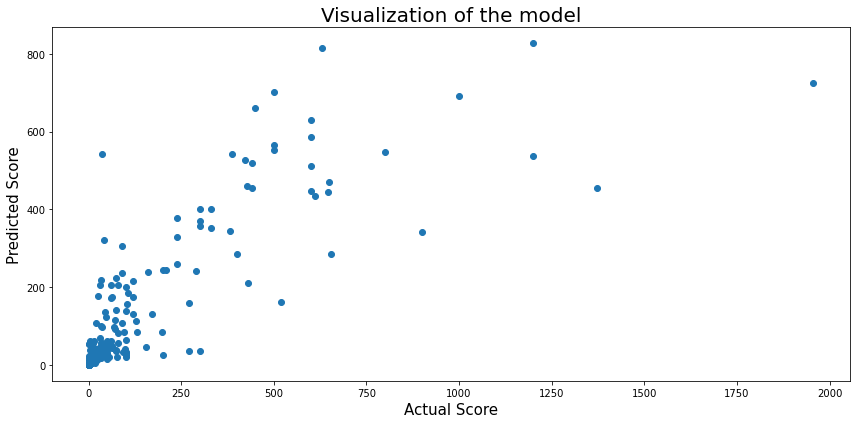

In [46]:
#Visiualizing it on plot.

plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

### Cross Validation:

In [47]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.6901340246222214

Since there is not much difference we can say that the model is neither overfitting or underfitting.

### HyperParameter Tuning:

In [48]:
##Doing hyper parameter tuning for it

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {'n_estimators':[200,130,210,220],
         'max_depth':[41,53,52],
         'min_samples_leaf': [2,10,11],
         'min_samples_split': [3,13,14],
         'random_state':[1500,700,1600]}

In [51]:
grid = GridSearchCV(RF, param_grid= params, cv= 5, n_jobs=-1)

In [52]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [41, 53, 52],
                         'min_samples_leaf': [2, 10, 11],
                         'min_samples_split': [3, 13, 14],
                         'n_estimators': [200, 130, 210, 220],
                         'random_state': [1500, 700, 1600]})

In [53]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'max_depth': 41, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200, 'random_state': 700}


In [54]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [55]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=41, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=200, random_state=700)

In [56]:
y_pred =  clf.predict(x_test)

In [57]:
mean_squared_error(y_test,y_pred)

13831.891092509537

In [58]:
clf.score(x_test,y_test)

0.7627631824132555

In [59]:
mean_absolute_error(y_test,y_pred)

40.16520944663285

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred))

117.60906041844538

In [61]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.6875510422385056

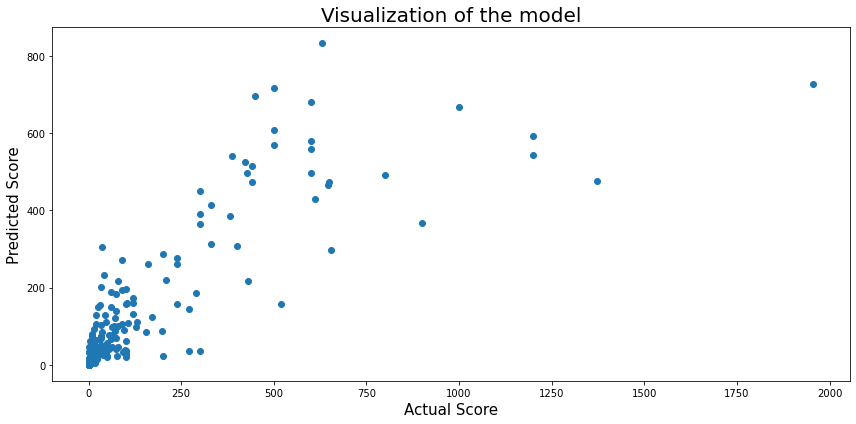

In [62]:
plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [62]:
#Saving the model

In [64]:
import joblib

In [65]:
filename = 'Global Power Plant.sav'
joblib.dump(clf, filename)

['Global Power Plant.sav']